In [1]:
#Lib imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
plt.style.use('default')
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted')
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import confusion_matrix
import sys, os, io, string, shutil, math
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA 
from sklearn import preprocessing
import scipy.linalg as la
import re
#from tabulate import tabulate
from scipy import stats
import pickle
from sklearn.utils import shuffle


In [81]:
def read_density_profiles(path):
    try:
        # if lammps header is there remove it
        with open(path, 'r') as fin:
            data = fin.read().splitlines(True)
            if '# Chunk-averaged data for fix' in data[0]:
                with open(path, 'w') as fout:
                    fout.writelines(data[4:])
        
        density_profile_p = np.loadtxt(path)
        return density_profile_p
    except Exception as e: 
        print(e)
        sys.stderr.write('Can not find the positive density results file')
        sys.exit(1)
        
        
def read_enerygy_file(path):
    try:
        energy = np.loadtxt(path)
        return energy
    except Exception as e: 
        print(e)
        sys.stderr.write('Can not find the energy file')
        sys.exit(1)        


def plot_density_profile(ax, data, titleText):
    # choose a color palette with seaborn.
    ax.plot(data[:,0],data[:,1])
    ax.set_title(titleText, fontsize=16) 
    ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='medium')
    ax.yaxis.set_tick_params(labelsize='medium')
    ax.set_xlabel('Z (nm)', fontsize=16)
    ax.set_ylabel('Density (M)', fontsize=16)
    
    
def plot_energy_file(ax, data, titleText):
    # choose a color palette with seaborn.
    ax.plot(data[:,0],data[:,1])
    ax.set_title(titleText, fontsize=16) 
    ax.legend()
    #ax.axis('off')
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    ax.xaxis.set_tick_params(labelsize='medium')
    ax.yaxis.set_tick_params(labelsize='medium')
    ax.set_xlabel('Z (nm)', fontsize=16)
    ax.set_ylabel('Density (M)', fontsize=16)


## Density profile

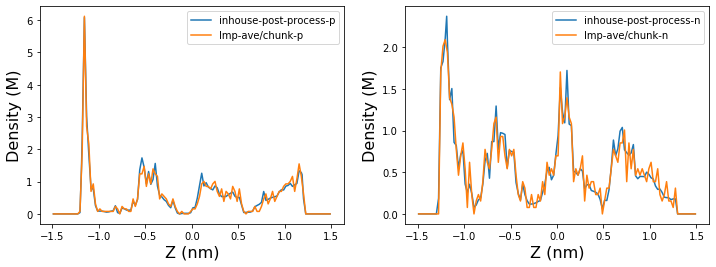

In [85]:
path = "../bin/data/p_density_profile.dat"
density_1 = read_density_profiles(path)

path = "../bin/data/p_density_profile.lmp.dat"
density_2 = read_density_profiles(path)

#take the low value
ion_diameter=0.474

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4*1))
ax[0].plot(density_1[:,0], density_1[:,1] , label="inhouse-post-process-p")
ax[0].plot(density_2[:,1]*ion_diameter, density_2[:,3] /ion_diameter**3 / 0.6022, label="lmp-ave/chunk-p")
ax[0].axis('tight')
ax[0].xaxis.set_tick_params(labelsize='medium')
ax[0].yaxis.set_tick_params(labelsize='medium')
ax[0].set_xlabel('Z (nm)', fontsize=16)
ax[0].set_ylabel('Density (M)', fontsize=16)
ax[0].legend()


path = "../bin/data/n_density_profile.dat"
density_1 = read_density_profiles(path)

path = "../bin/data/n_density_profile.lmp.dat"
density_2 = read_density_profiles(path)

ax[1].plot(density_1[:,0], density_1[:,1] , label="inhouse-post-process-n")
ax[1].plot(density_2[:,1]*ion_diameter, density_2[:,3] /ion_diameter**3 / 0.6022, label="lmp-ave/chunk-n")
ax[1].axis('tight')
ax[1].xaxis.set_tick_params(labelsize='medium')
ax[1].yaxis.set_tick_params(labelsize='medium')
ax[1].set_xlabel('Z (nm)', fontsize=16)
ax[1].set_ylabel('Density (M)', fontsize=16)
ax[1].legend()

plt.show()

## Energy vs time